In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.feature_selection import RFE

In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
PassengerId = test['PassengerId']

・PassengerId – 乗客識別ユニークID<br>
・Survived – 生存フラグ（0=死亡、1=生存）<br>
・Pclass – チケットクラス<br>
・Name – 乗客の名前<br>
・Sex – 性別（male=男性、female＝女性）<br>
・Age – 年齢<br>
・SibSp – タイタニックに同乗している兄弟/配偶者の数<br>
・parch – タイタニックに同乗している親/子供の数<br>
・ticket – チケット番号<br>
・fare – 料金<br>
・cabin – 客室番号<br>
・Embarked – 出港地（タイタニックへ乗った港）<br>

pclass = チケットクラス<br>
1 = 上層クラス（お金持ち）<br>
2 = 中級クラス（一般階級）<br>
3 = 下層クラス（労働階級）<br>

Embarked = 出港地<br>
C = Cherbourg<br>
Q = Queenstown<br>
S = Southampton<br>

In [30]:
y = train.Survived
train = train[[col for col in train.columns if col != 'Survived']]

print(train.shape)
print(test.shape)

(891, 11)
(418, 11)


In [31]:
X = pd.concat([train, test], axis=0)

print(X.shape)
X.head(10)

(1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
X.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [33]:
# カテゴリ変数の変換
def code_transform(x):
    
    if x == 'male':
        y = 0
    else:
        y = 1
        
    return y

X['Sex'] = X.Sex.apply(lambda x: code_transform(x))
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [34]:
def code_transform(x):
    
    if x == 'C':
        y = 0
    elif x == 'Q':
        y = 1
    else:
        y = 2
        
    return y

X['Embarked'] = X.Embarked.apply(lambda x: code_transform(x))
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [35]:
# 数値カラムと文字カラムの分割
numerical_col = [col for col in X.columns if X[col].dtype != 'object']
categorical_col = [col for col in X.columns if X[col].dtype == 'object']

print(numerical_col)
print(categorical_col)

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
['Name', 'Ticket', 'Cabin']


In [36]:
# 欠損値の処理
X.Cabin.fillna(value='missing', inplace=True)
X.Embarked.fillna(X.Embarked.median(), inplace=True)
X.Fare.fillna(X.Fare.median(), inplace=True)
X.Age.fillna(X.Age.median(), inplace=True)

X.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
X_num = X[numerical_col]
X_cat = X[categorical_col]
X_cat = pd.get_dummies(X_cat)

print(X_num.shape)
print(X_cat.shape)

(1309, 8)
(1309, 2423)


In [38]:
X_total = pd.concat([X_num, X_cat], axis=1)

print(X_total.shape)
X_total.head()

(1309, 2431)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph",...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_missing
0,1,3,0,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1,26.0,0,0,7.9250,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,0,35.0,0,0,8.0500,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
train_rows = train.shape[0]
X = X_total[:train_rows]

std = StandardScaler()
X = std.fit_transform(X)

y = y[:train_rows]

print(X.shape)
print(y.shape)

(891, 2431)
(891,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 2431)
(623,)
(268, 2431)
(268,)


In [41]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_proba = logreg.predict_proba(X_test)[: , 1]
print(y_proba[:5])

y_pred = logreg.predict(X_test)
print(y_pred[:5])

[0.90784721 0.09948558 0.36329043 0.18493678 0.43881127]
[1 0 0 0 0]


accuracy: 0.7723880597014925
f1_score: 0.6013071895424837
Training_set_score: 1.0
Test_set_score: 1.0


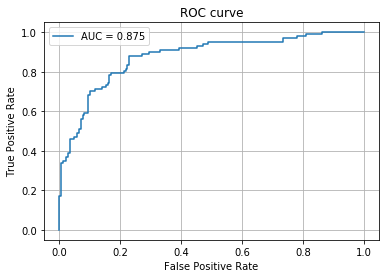

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print('accuracy:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))
print('Training_set_score:', logreg.score(X_train, y_train))
print('Test_set_score:', logreg.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       170
           1       0.84      0.47      0.60        98

    accuracy                           0.77       268
   macro avg       0.80      0.71      0.72       268
weighted avg       0.79      0.77      0.75       268



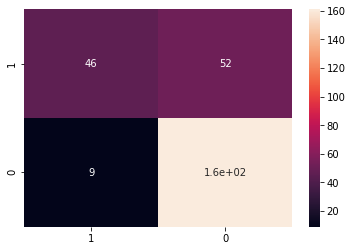

In [44]:
classes = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=classes)

cmdf = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(cmdf, annot=True)
print(classification_report(y_test, y_pred))

In [48]:
X_test_submit = X_total[train_rows:]
X_test_submit = std.fit_transform(X_test_submit)

print(X_train.shape)
print(X_test_submit.shape)

(623, 2431)
(418, 2431)


In [49]:
y_proba_submit = logreg.predict_proba(X_test_submit)[: , 1]
print(y_proba_submit[:5])

y_pred_submit = logreg.predict(X_test_submit)
print(y_pred_submit[:5])

[0.02342065 0.18232356 0.06760457 0.06219097 0.76277487]
[0 0 0 0 1]


In [52]:
df_submit = pd.DataFrame(y_pred_submit, index=PassengerId, columns=['Survived'])
df_submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [53]:
df_submit.to_csv('titanic_submit.csv')

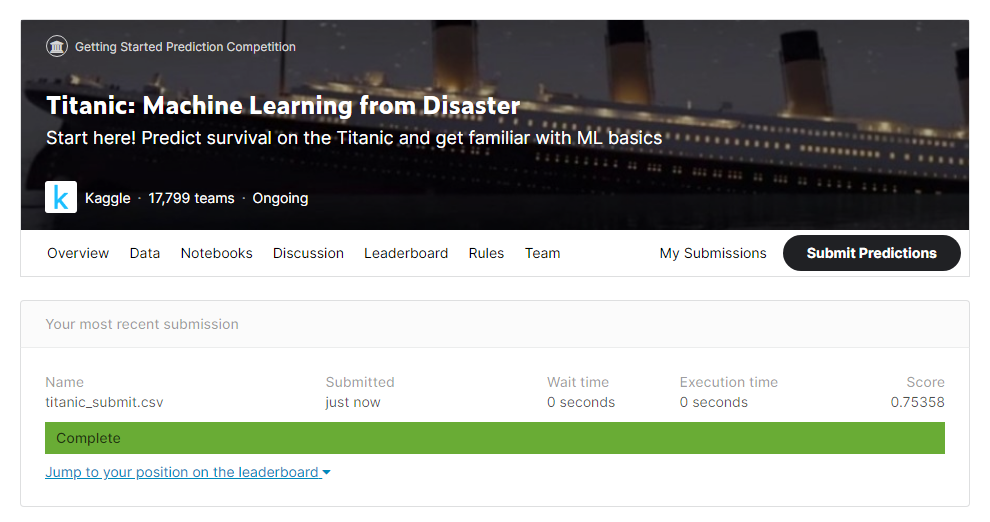